In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv('test.csv')

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


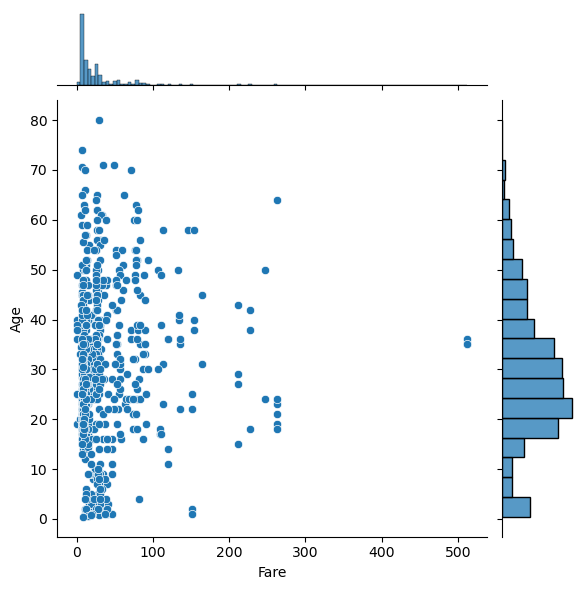

In [6]:
sns.jointplot(data=train_data, y='Age', x='Fare', kind='scatter')

plt.ylabel('Age')
plt.xlabel('Fare')

plt.show()

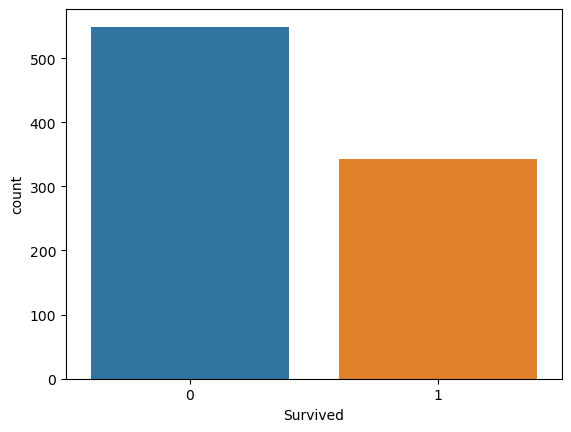

In [7]:
sns.countplot(data=train_data, x='Survived')

plt.show()

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

[Text(0, 0.5, '')]

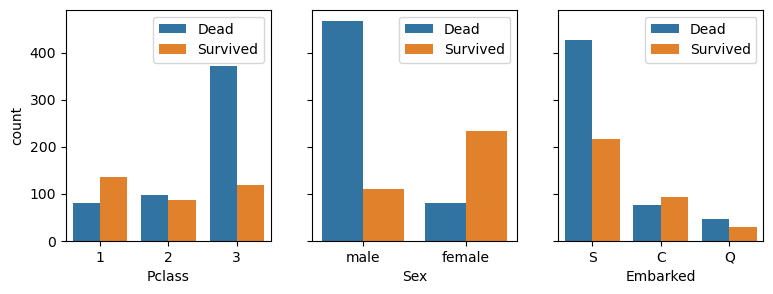

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.set_size_inches([9,3])
sns.countplot(x="Pclass", hue='Survived',data=train_data, ax=ax0).legend(["Dead","Survived"])
sns.countplot(x="Sex", hue='Survived',data=train_data, ax=ax1).legend(["Dead","Survived"]); ax1.set(ylabel='')
sns.countplot(x="Embarked", hue='Survived',data=train_data, ax=ax2).legend(["Dead","Survived"]); ax2.set(ylabel='')

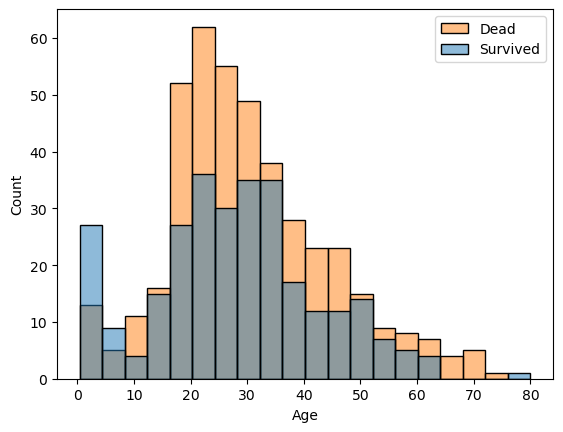

In [11]:
sns.histplot(x="Age", hue='Survived', hue_order = [1,0],data=train_data).legend(["Dead","Survived"])

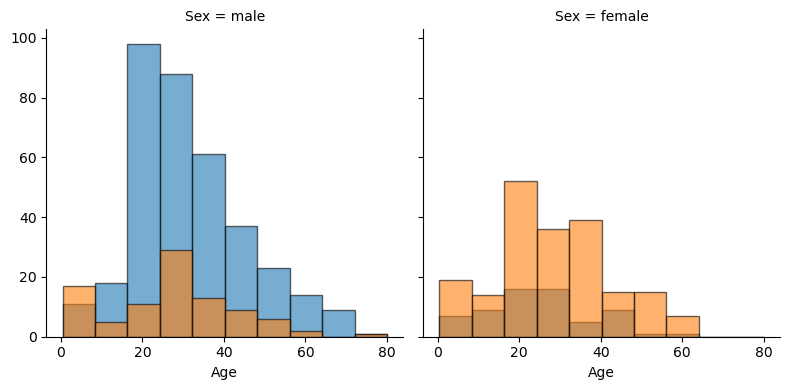

In [12]:
g = sns.FacetGrid(train_data, col="Sex", hue="Survived", height=4)

combined_age = train_data['Age'].dropna()
_, bin_edges = np.histogram(combined_age, bins=10)

g.map(plt.hist, "Age", bins=bin_edges, alpha=0.6, edgecolor="black")

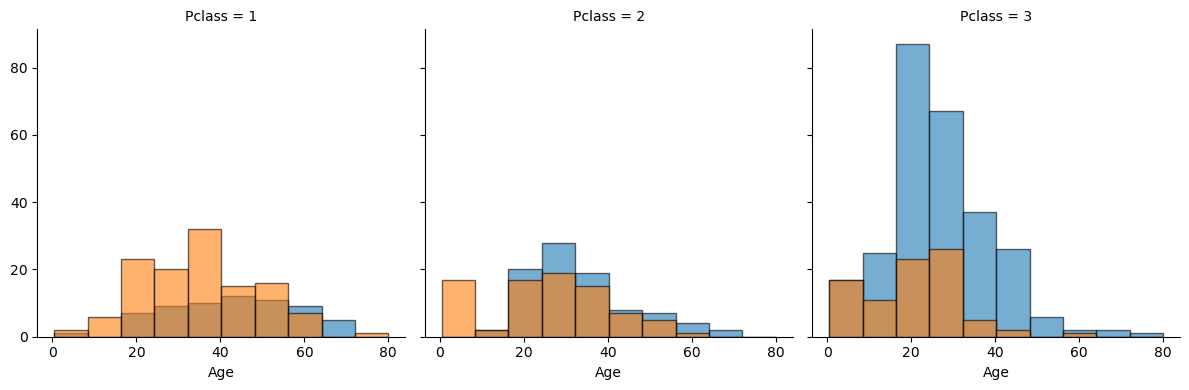

In [13]:
g = sns.FacetGrid(train_data, col="Pclass", hue="Survived", height=4)

combined_age = train_data['Age'].dropna()
_, bin_edges = np.histogram(combined_age, bins=10)

g.map(plt.hist, "Age", bins=bin_edges, alpha=0.6, edgecolor="black")

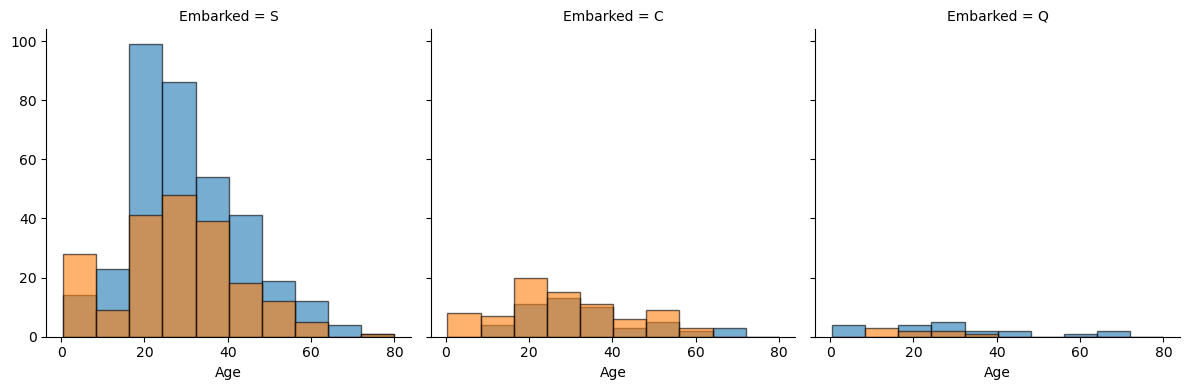

In [14]:
g = sns.FacetGrid(train_data, col="Embarked", hue="Survived", height=4)

combined_age = train_data['Age'].dropna()
_, bin_edges = np.histogram(combined_age, bins=10)

g.map(plt.hist, "Age", bins=bin_edges, alpha=0.6, edgecolor="black")

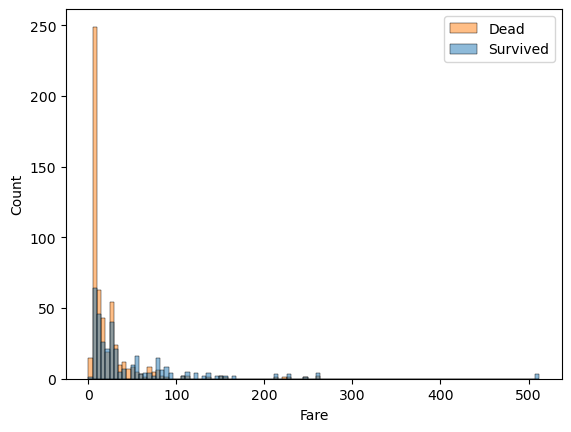

In [15]:
sns.histplot(x="Fare", hue='Survived', hue_order = [1,0],data=train_data).legend(["Dead","Survived"])

C:\Users\Swastika\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Swastika\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


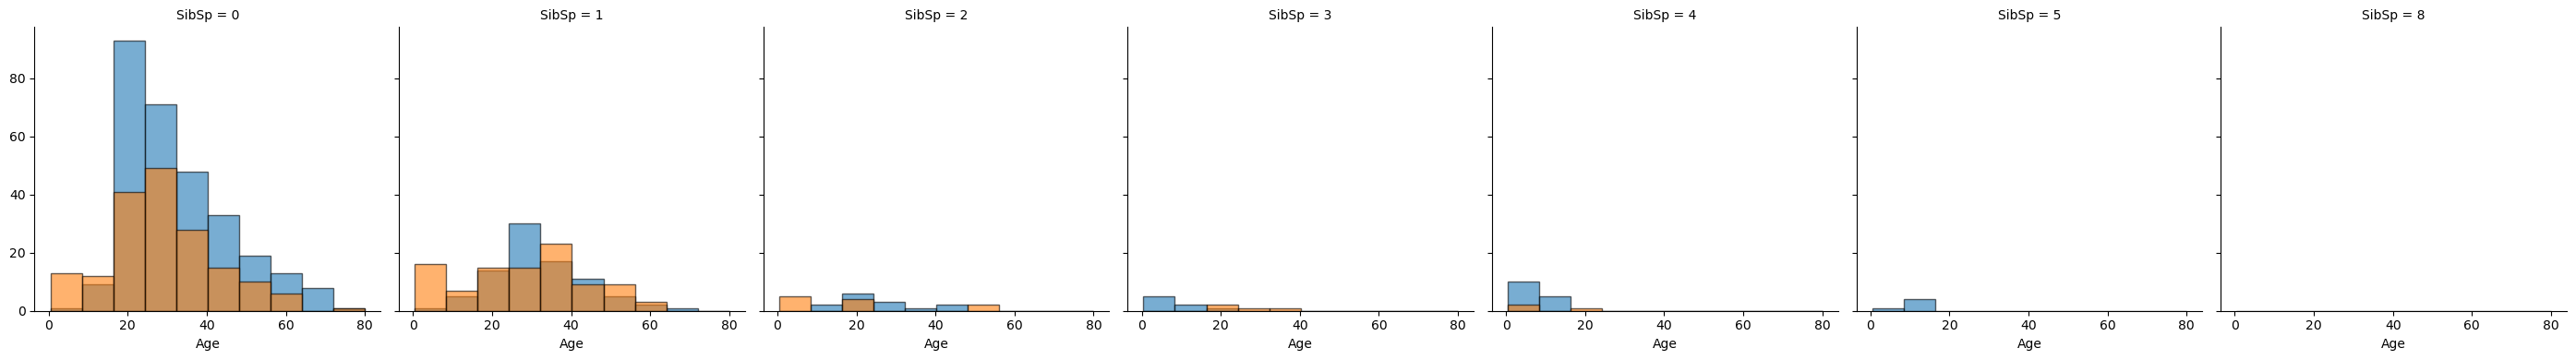

In [16]:
g = sns.FacetGrid(train_data, col="SibSp", hue="Survived", height=4)

combined_age = train_data['Age'].dropna()
_, bin_edges = np.histogram(combined_age, bins=10)

g.map(plt.hist, "Age", bins=bin_edges, alpha=0.6, edgecolor="black")

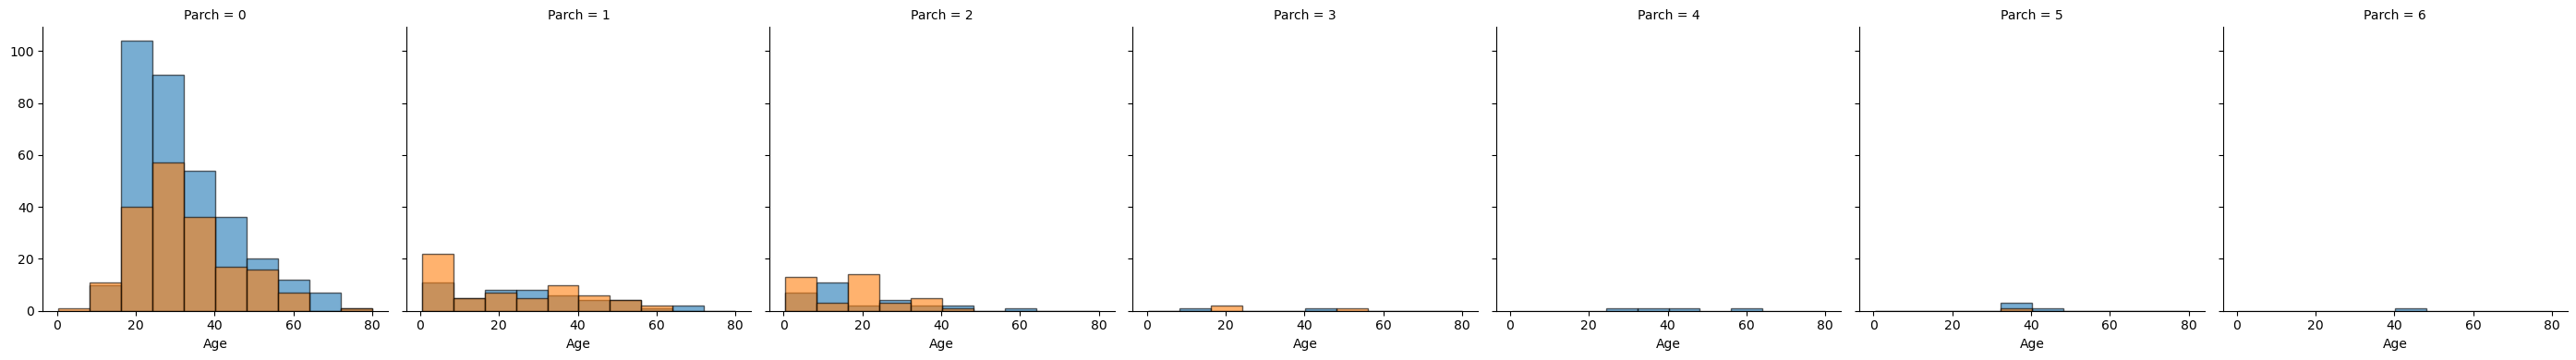

In [17]:
g = sns.FacetGrid(train_data, col="Parch", hue="Survived", height=4)

combined_age = train_data['Age'].dropna()
_, bin_edges = np.histogram(combined_age, bins=10)

g.map(plt.hist, "Age", bins=bin_edges, alpha=0.6, edgecolor="black")

In [18]:
train_data['Age'] = train_data['Age'].fillna(value = round(train_data.Age.mean()))
train_data['Fare'] = train_data['Fare'].fillna(value = 0)
train_data['Cabin'] = train_data['Cabin'].fillna(value = "NA")
train_data['Embarked'] = train_data['Embarked'].fillna(value = "NA")

test_data['Age'] = test_data['Age'].fillna(value = round(train_data.Age.mean()))
test_data['Fare'] = test_data['Fare'].fillna(value = 0)
test_data['Cabin'] = test_data['Cabin'].fillna(value = "NA")
test_data['Embarked'] = test_data['Embarked'].fillna(value = "NA")

In [19]:
train_data_new = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
train_data_new['TicketPrefix'] = train_data_new['Ticket'].str.extract('([A-Za-z]+)[^\w]', expand=False)
train_data_new['TicketLength'] = train_data_new['Ticket'].str.len()
train_data_new['IsNumericTicket'] = train_data_new['Ticket'].str.isnumeric().astype(int)
train_data_new.drop('Ticket', axis=1, inplace=True)
train_data_new['Salutation'] = train_data_new['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data_new = pd.get_dummies(train_data_new, columns=['Salutation'], prefix='Salutation', drop_first=True)
train_data_new.drop('Name', axis=1, inplace=True)
train_data_new['Deck'] = train_data_new['Cabin'].str.slice(0, 1)
train_data_new = pd.get_dummies(train_data_new, columns=['Deck'], prefix='Deck', drop_first=True)
train_data_new['HasCabin'] = train_data_new['Cabin'].notnull().astype(int)
train_data_new.drop('Cabin', axis=1, inplace=True)
encoded_columns = train_data_new.drop('Survived', axis=1).columns

In [20]:
train_data_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_NA,Embarked_Q,...,Salutation_Sir,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,HasCabin
0,1,0,3,22.0,1,0,7.2500,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [21]:
encoded_columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_NA', 'Embarked_Q', 'Embarked_S', 'TicketPrefix',
       'TicketLength', 'IsNumericTicket', 'Salutation_Col',
       'Salutation_Countess', 'Salutation_Don', 'Salutation_Dr',
       'Salutation_Jonkheer', 'Salutation_Lady', 'Salutation_Major',
       'Salutation_Master', 'Salutation_Miss', 'Salutation_Mlle',
       'Salutation_Mme', 'Salutation_Mr', 'Salutation_Mrs', 'Salutation_Ms',
       'Salutation_Rev', 'Salutation_Sir', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_N', 'Deck_T', 'HasCabin'],
      dtype='object')

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [23]:
X = train_data_new.drop('Survived', axis=1)
y = train_data_new['Survived']

categorical_columns = X.select_dtypes(include=['object']).columns

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
X_encoded = pd.get_dummies(X_imputed, columns=categorical_columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("Precision:", precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall:", recall)

confusion = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8212290502793296
Precision: 0.8088235294117647
Recall: 0.7432432432432432
Confusion Matrix:
[[92 13]
 [19 55]]


In [24]:
test_new = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)
test_new['TicketPrefix'] = test_new['Ticket'].str.extract('([A-Za-z]+)[^\w]', expand=False)
test_new = pd.get_dummies(test_new, columns=['TicketPrefix'], prefix='TicketPrefix', drop_first=True)
test_new['TicketLength'] = test_new['Ticket'].str.len()
test_new['IsNumericTicket'] = test_new['Ticket'].str.isnumeric().astype(int)
test_new.drop('Ticket', axis=1, inplace=True)
test_new['Salutation'] = test_new['Name'].str.extract(' ([A-Za-z]+).', expand=False)
test_new = pd.get_dummies(test_new, columns=['Salutation'], prefix='Salutation', drop_first=True)
test_new.drop('Name', axis=1, inplace=True)
test_new['Deck'] = test_new['Cabin'].str.slice(0, 1)
test_new = pd.get_dummies(test_new, columns=['Deck'], prefix='Deck', drop_first=True)
test_new['HasCabin'] = test_new['Cabin'].notnull().astype(int)
test_new.drop('Cabin', axis=1, inplace=True)

In [25]:
test_new.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,TicketPrefix_AQ,...,Salutation_Rev,Salutation_y,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,HasCabin
0,892,3,34.5,0,0,7.8292,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,894,2,62.0,0,0,9.6875,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,895,3,27.0,0,0,8.6625,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [26]:
realigned_test = test_new.reindex(columns=encoded_columns, fill_value=0)
imputed_test = pd.DataFrame(imputer.transform(realigned_test), columns=realigned_test.columns)
imputed_test = imputed_test.reindex(columns=X_train.columns, fill_value=0)
predicted_test = model.predict(imputed_test)

# Creating a DataFrame with 'PassengerId' and 'Survived' columns
result_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predicted_test
})


In [27]:
result_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
